# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

## Solucion al ejercicio Diabetes

In [49]:
'''
    IMPORTACION DE LIBRERIAS.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
import logging
from matplotlib.pyplot import figure

### Lectura de los datos.

In [17]:
diabetes = pd.read_csv('datos/diabetes.csv')
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634599e-16,1.296411e-16,-8.042209e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.575274e-16,3.780755e-16,-3.830854e-16,-3.411950e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


### Correlacion de los datos.

Para determinar que variables necesitamos son necesarias para trabajar el modelo recurrimos a una correlacion, la cual provee un valor entre 1 y -1, cuando está más cercano el 0 hay menor correlación.
Así podemos eliminar variables correlacionadas.


In [18]:
correlacion = diabetes.corr()
correlacion

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


La correlacion entre S1 Y S2 es muy alta CORR = 0.896663, podemos eliminar una de las variables.

Podemos desarrollar un *HEATMAP* que nos va a proveer una mejor idea de la correlacion entre las variables.

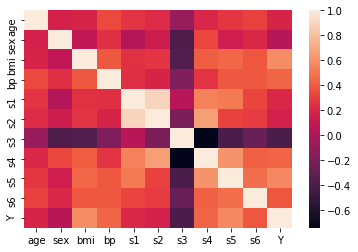

In [19]:
sns.heatmap(correlacion)

Podemos apreciar de acuerdo al gráfico que las variables S3 y S4 tienen una correlación muy fuerte = -0.738493, por tanto podemos eliminar una de los dos. Procedemos a eliminar S2 y S4.

In [20]:
diabetes = diabetes.drop(['s2', 's4'], axis=1)

In [21]:
diabetes.head()

,age,sex,bmi,bp,s1,s3,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.043401,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,0.074412,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.032356,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,-0.036038,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.008142,-0.031991,-0.046641,135.0


### Regresion Lineal

Procedemos a realizar transformaciones para mirar si se mejora el pronóstico, entrenado por medio de un modelo de regresión lineal. 

#### $y = x$
#### $y = \ln(x)$
#### $y = x^{3}$
#### $y = x^{2}$

In [37]:
def obtener_funcion(nombre):
    if (nombre ==  "funcion_exponencial"):
        return lambda x: np.exp(x)
    elif (nombre == "funcion_cubica"):
        return lambda x: x**3
    elif (nombre == "funcion_identidad"):
        return lambda x: x
    elif (nombre == "funcion_cuadrada"):
        return lambda x: x**2
    
    
transformaciones = ["funcion_exponencial", "funcion_cubica", "funcion_identidad", "funcion_cuadrada" ]


model_results = pd.DataFrame(columns = ["transformacion","MAE","MSE","RMSE"])

for transformacion in transformaciones:
    dataset_transformado = diabetes.apply(obtener_funcion(transformacion))
    # Tomaremos un conjunto de entrenamiento del 70 %.
    X_train, X_test, y_train, y_test = train_test_split(dataset_transformado.drop(['Y'], axis=1), 
                                                        dataset_transformado['Y'], test_size=0.30)
    
    
    # Aplicamos el modelo de regresion lineal.
    lineal_regression_model = LinearRegression()
    
    '''
        Entrenamiento del modelo
    '''
    lineal_regression_model.fit(X_train,y_train)
    predictions = lineal_regression_model.predict(X_test)
    
    
    '''
        Metricas
    '''
    MAE =  metrics.mean_absolute_error(y_test, predictions)
    MSE = metrics.mean_squared_error(y_test, predictions)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
                                              
                                              
    model_results = model_results.append({
        "transformacion": transformacion,
        "MAE": MAE,
        "MSE": MSE,
        "RMSE": RMSE
    },ignore_index=True)
                                            
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
model_results

,transformacion,MAE,MSE,RMSE
0,funcion_exponencial,13962838383683772340332439901899675998004590969...,25582815178907852260644695929091589036611565088...,15994628841866839220466749464601313114752261315...
1,funcion_cubica,5546265.652,65932742297268.867,8119897.924
2,funcion_identidad,45.546,3233.831,56.867
3,funcion_cuadrada,21286.401,679545918.419,26068.102


### Conclusion

Se puede concluir que el modelo de REGRESION LINEAL con mejores resultado con respecto a las metricas (Error cuadratico medio, error absoluto medio) es sin ninguna transformación.


ELECCIÓN: Trabajar el dataset sin ninguna transformacion.

## Redes Neuronales

### Metodo: TensorFlow. DNN Classifier.

Con este método, queremos obtener el numero de neuronas por capa óptimo y número de neuronas en la capa oculta.

In [41]:
'''

 Obtenemos dataset de entrenamiento y de testing. 80% Entrenamiento
 
'''


X_train, X_test, y_train, y_test = train_test_split(diabetes.drop(["Y"],axis=1),
                                                    diabetes["Y"],
                                                    test_size=0.2,
                                                    random_state=101)

X_train.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5', 's6'], dtype='object')

In [42]:
'''
 Creacion de las columnas en TENSORFLOW Necesarias para el modelo
'''

age = tf.feature_column.numeric_column('age')
sex = tf.feature_column.numeric_column('sex')
bmi = tf.feature_column.numeric_column('bmi')
bp = tf.feature_column.numeric_column('bp')
s1 = tf.feature_column.numeric_column('s1')
s3 = tf.feature_column.numeric_column('s3')
s5 = tf.feature_column.numeric_column('s5')
s6 = tf.feature_column.numeric_column('s6')

In [44]:
columnas_dataset_tf = [age,sex, bmi, bp, s1, s3, s5, s6]

### Neuronas en la capa oculta

In [47]:
'''
 Aplicar funcion de entrada para el entrenamiento de la red.
'''
funcion_entrada = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                      y=y_train ,
                                                      batch_size=10,
                                                      num_epochs=3000,
                                                      shuffle=True)


'''
 Debido al costo computacional se decide trabajar con estos valores potencias de dos para encontrar el óptimo
'''

neuronas_por_capa = [2,4,8,16,32,64]

results = pd.DataFrame(columns = ["neuronas_por_capa", "MSE"])

'''
 Suponemos 3 NEURONAS En la capa oculta.
'''

for n in neuronas_por_capa:

    model = tf.estimator.DNNRegressor(hidden_units=[n,n,n],feature_columns=columnas_dataset_tf)

    model.train(input_fn=funcion_entrada,steps=5000)

    predict_input_func = tf.estimator.inputs.pandas_input_fn(
        x=X_test,
        batch_size=10,
        num_epochs=1,
        shuffle=False)

    pred_gen = model.predict(predict_input_func)

    predictions = list(pred_gen)

    final_predictions = []

    for pred in predictions:
        final_predictions.append(pred['predictions'])   
    
    MSE = mean_squared_error(y_test,final_predictions)
    
    results = results.append({"neuronas_por_capa": n,"MSE": MSE },ignore_index=True)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp6seii3xl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa3e4073208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

INFO:tensorflow:global_step/sec: 270.334
INFO:tensorflow:loss = 48279.035, step = 501 (0.370 sec)
INFO:tensorflow:global_step/sec: 275.785
INFO:tensorflow:loss = 42453.09, step = 601 (0.362 sec)
INFO:tensorflow:global_step/sec: 377.192
INFO:tensorflow:loss = 44136.598, step = 701 (0.266 sec)
INFO:tensorflow:global_step/sec: 304.592
INFO:tensorflow:loss = 19594.29, step = 801 (0.327 sec)
INFO:tensorflow:global_step/sec: 418.566
INFO:tensorflow:loss = 12968.651, step = 901 (0.239 sec)
INFO:tensorflow:global_step/sec: 415.201
INFO:tensorflow:loss = 22645.16, step = 1001 (0.241 sec)
INFO:tensorflow:global_step/sec: 434.288
INFO:tensorflow:loss = 30415.861, step = 1101 (0.231 sec)
INFO:tensorflow:global_step/sec: 421.162
INFO:tensorflow:loss = 11295.818, step = 1201 (0.237 sec)
INFO:tensorflow:global_step/sec: 418.356
INFO:tensorflow:loss = 17540.242, step = 1301 (0.239 sec)
INFO:tensorflow:global_step/sec: 428.7
INFO:tensorflow:loss = 13365.463, step = 1401 (0.233 sec)
INFO:tensorflow:glob

INFO:tensorflow:loss = 19288.81, step = 2201 (0.268 sec)
INFO:tensorflow:global_step/sec: 376.213
INFO:tensorflow:loss = 7555.7446, step = 2301 (0.266 sec)
INFO:tensorflow:global_step/sec: 299.713
INFO:tensorflow:loss = 20056.043, step = 2401 (0.341 sec)
INFO:tensorflow:global_step/sec: 208.795
INFO:tensorflow:loss = 36064.734, step = 2501 (0.471 sec)
INFO:tensorflow:global_step/sec: 244.362
INFO:tensorflow:loss = 18430.473, step = 2601 (0.411 sec)
INFO:tensorflow:global_step/sec: 382.116
INFO:tensorflow:loss = 14784.658, step = 2701 (0.261 sec)
INFO:tensorflow:global_step/sec: 422.822
INFO:tensorflow:loss = 44193.64, step = 2801 (0.237 sec)
INFO:tensorflow:global_step/sec: 359
INFO:tensorflow:loss = 35886.258, step = 2901 (0.280 sec)
INFO:tensorflow:global_step/sec: 432.846
INFO:tensorflow:loss = 25165.1, step = 3001 (0.229 sec)
INFO:tensorflow:global_step/sec: 381.088
INFO:tensorflow:loss = 35537.496, step = 3101 (0.263 sec)
INFO:tensorflow:global_step/sec: 321.958
INFO:tensorflow:lo

INFO:tensorflow:global_step/sec: 376.941
INFO:tensorflow:loss = 17590.082, step = 4001 (0.266 sec)
INFO:tensorflow:global_step/sec: 322.851
INFO:tensorflow:loss = 46490.914, step = 4101 (0.310 sec)
INFO:tensorflow:global_step/sec: 424.876
INFO:tensorflow:loss = 32364.424, step = 4201 (0.235 sec)
INFO:tensorflow:global_step/sec: 430.862
INFO:tensorflow:loss = 22685.479, step = 4301 (0.232 sec)
INFO:tensorflow:global_step/sec: 422.288
INFO:tensorflow:loss = 45529.965, step = 4401 (0.237 sec)
INFO:tensorflow:global_step/sec: 428.305
INFO:tensorflow:loss = 19607.746, step = 4501 (0.233 sec)
INFO:tensorflow:global_step/sec: 413.875
INFO:tensorflow:loss = 21826.164, step = 4601 (0.242 sec)
INFO:tensorflow:global_step/sec: 421.054
INFO:tensorflow:loss = 15635.822, step = 4701 (0.237 sec)
INFO:tensorflow:global_step/sec: 417.387
INFO:tensorflow:loss = 7126.502, step = 4801 (0.239 sec)
INFO:tensorflow:global_step/sec: 432.646
INFO:tensorflow:loss = 19612.62, step = 4901 (0.232 sec)
INFO:tensorf

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp54fgch50/model.ckpt.
INFO:tensorflow:loss = 344544.84, step = 1
INFO:tensorflow:global_step/sec: 115.793
INFO:tensorflow:loss = 22305.273, step = 101 (0.865 sec)
INFO:tensorflow:global_step/sec: 445.586
INFO:tensorflow:loss = 13671.164, step = 201 (0.225 sec)
INFO:tensorflow:global_step/sec: 334.652
INFO:tensorflow:loss = 14658.782, step = 301 (0.302 sec)
INFO:tensorflow:global_step/sec: 259.267
INFO:tensorflow:loss = 24372.54, step = 401 (0.384 sec)
INFO:tensorflow:global_step/sec: 305.601
INFO:tensorflow:loss = 14745.988, step = 501 (0.326 sec)
INFO:tensorflow:global_step/sec: 196.381
INFO:tensorflow:loss = 47238.78, step = 601 (0.508 sec)
INFO:tensorflow:global_step/sec: 229.929
INFO:tensorflow:lo

   neuronas_por_capa       MSE
0              2.000 28104.665
1              4.000  2828.386
2              8.000  2783.500
3             16.000  2777.658
4             32.000  2694.001
5             64.000  2688.446


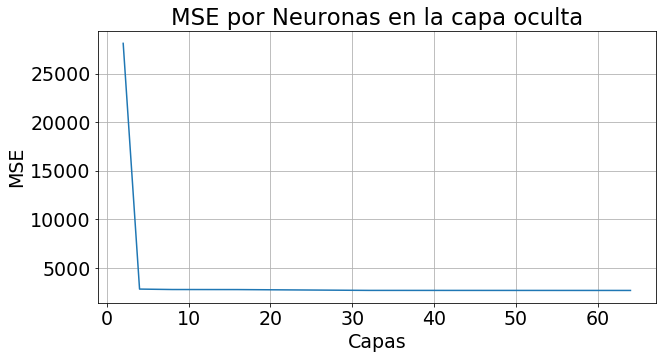

In [65]:
print(results)

plt.figure(figsize=(10,5))
plt.xlabel('Capas')
plt.title("MSE por Neuronas en la capa oculta")
plt.plot(results['neuronas_por_capa'], results['MSE'])
plt.ylabel('MSE')
plt.grid()


 Debida la complejidad algoritmica a partir de 4 neuronas en la capa oculta el modelo empieza a mejorar su MSE, por tanto se opta por 4 neuronas por capa oculta.


### Capas Ocultas

In [59]:
# Ahora obtengamos el numero de neuronas en la capa oculta, teniendo que en cuenta que el numero de neuronas por
# capa es 4.

posibles_capas_ocultas = [[4],[4,4],[4,4,4],[4,4,4,4],[4,4,4,4,4],[4,4,4,4,4,4]]

results_capa_oculta = pd.DataFrame(columns = ["capas_ocultas", "MSE"])

for capas_ocultas in posibles_neuronas_capa_oculta:

    model = tf.estimator.DNNRegressor(hidden_units=capas_ocultas,feature_columns=columnas_dataset_tf)

    model.train(input_fn=funcion_entrada,steps=5000)

    predict_input_func = tf.estimator.inputs.pandas_input_fn(
        x=X_test,
        batch_size=10,
        num_epochs=1,
        shuffle=False)

    pred_gen = model.predict(predict_input_func)

    predictions = list(pred_gen)

    final_predictions = []

    for pred in predictions:
        final_predictions.append(pred['predictions'])   
    
    MSE = mean_squared_error(y_test,final_predictions)
    
    numero_capas_ocultas = len(capas_ocultas)
    results_capa_oculta = results_capa_oculta.append({"capas_ocultas": numero_capas_ocultas ,"MSE": MSE },ignore_index=True)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1vs1sn9k', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa3df4e6dd8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

INFO:tensorflow:global_step/sec: 427.219
INFO:tensorflow:loss = 74907.33, step = 501 (0.234 sec)
INFO:tensorflow:global_step/sec: 414.709
INFO:tensorflow:loss = 43265.844, step = 601 (0.242 sec)
INFO:tensorflow:global_step/sec: 402.522
INFO:tensorflow:loss = 30064.299, step = 701 (0.248 sec)
INFO:tensorflow:global_step/sec: 418.539
INFO:tensorflow:loss = 27175.887, step = 801 (0.239 sec)
INFO:tensorflow:global_step/sec: 422.237
INFO:tensorflow:loss = 49224.297, step = 901 (0.237 sec)
INFO:tensorflow:global_step/sec: 441.72
INFO:tensorflow:loss = 54289.305, step = 1001 (0.226 sec)
INFO:tensorflow:global_step/sec: 263.006
INFO:tensorflow:loss = 46238.07, step = 1101 (0.380 sec)
INFO:tensorflow:global_step/sec: 383.152
INFO:tensorflow:loss = 30029.6, step = 1201 (0.262 sec)
INFO:tensorflow:global_step/sec: 284.175
INFO:tensorflow:loss = 26357.7, step = 1301 (0.352 sec)
INFO:tensorflow:global_step/sec: 331.612
INFO:tensorflow:loss = 36758.387, step = 1401 (0.301 sec)
INFO:tensorflow:global

INFO:tensorflow:loss = 34177.797, step = 2201 (0.323 sec)
INFO:tensorflow:global_step/sec: 399.956
INFO:tensorflow:loss = 46299.06, step = 2301 (0.250 sec)
INFO:tensorflow:global_step/sec: 418.207
INFO:tensorflow:loss = 41676.31, step = 2401 (0.239 sec)
INFO:tensorflow:global_step/sec: 428.918
INFO:tensorflow:loss = 11274.156, step = 2501 (0.236 sec)
INFO:tensorflow:global_step/sec: 420.151
INFO:tensorflow:loss = 14643.571, step = 2601 (0.236 sec)
INFO:tensorflow:global_step/sec: 422.596
INFO:tensorflow:loss = 12418.392, step = 2701 (0.236 sec)
INFO:tensorflow:global_step/sec: 429.271
INFO:tensorflow:loss = 44593.78, step = 2801 (0.233 sec)
INFO:tensorflow:global_step/sec: 425.786
INFO:tensorflow:loss = 30424.889, step = 2901 (0.236 sec)
INFO:tensorflow:global_step/sec: 425.733
INFO:tensorflow:loss = 50384.234, step = 3001 (0.234 sec)
INFO:tensorflow:global_step/sec: 425.7
INFO:tensorflow:loss = 42313.94, step = 3101 (0.235 sec)
INFO:tensorflow:global_step/sec: 423.862
INFO:tensorflow:

INFO:tensorflow:global_step/sec: 415.032
INFO:tensorflow:loss = 31271.027, step = 4001 (0.241 sec)
INFO:tensorflow:global_step/sec: 418.273
INFO:tensorflow:loss = 12044.828, step = 4101 (0.239 sec)
INFO:tensorflow:global_step/sec: 421.313
INFO:tensorflow:loss = 37405.047, step = 4201 (0.238 sec)
INFO:tensorflow:global_step/sec: 419.687
INFO:tensorflow:loss = 31262.979, step = 4301 (0.238 sec)
INFO:tensorflow:global_step/sec: 419.253
INFO:tensorflow:loss = 43789.984, step = 4401 (0.238 sec)
INFO:tensorflow:global_step/sec: 416.483
INFO:tensorflow:loss = 25038.94, step = 4501 (0.240 sec)
INFO:tensorflow:global_step/sec: 411.496
INFO:tensorflow:loss = 11203.983, step = 4601 (0.243 sec)
INFO:tensorflow:global_step/sec: 420.271
INFO:tensorflow:loss = 50259.32, step = 4701 (0.238 sec)
INFO:tensorflow:global_step/sec: 411.617
INFO:tensorflow:loss = 54790.938, step = 4801 (0.242 sec)
INFO:tensorflow:global_step/sec: 413.989
INFO:tensorflow:loss = 36547.58, step = 4901 (0.242 sec)
INFO:tensorfl

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp1en5s_7p/model.ckpt.
INFO:tensorflow:loss = 309482.0, step = 1
INFO:tensorflow:global_step/sec: 120.031
INFO:tensorflow:loss = 333250.12, step = 101 (0.835 sec)
INFO:tensorflow:global_step/sec: 513.257
INFO:tensorflow:loss = 323055.7, step = 201 (0.195 sec)
INFO:tensorflow:global_step/sec: 401.94
INFO:tensorflow:loss = 264978.72, step = 301 (0.249 sec)
INFO:tensorflow:global_step/sec: 408.484
INFO:tensorflow:loss = 356451.38, step = 401 (0.244 sec)
INFO:tensorflow:global_step/sec: 398.724
INFO:tensorflow:loss = 294025.0, step = 501 (0.251 sec)
INFO:tensorflow:global_step/sec: 404.759
INFO:tensorflow:loss = 183152.3, step = 601 (0.247 sec)
INFO:tensorflow:global_step/sec: 402.484
INFO:tensorflow:loss 

In [61]:
results_capa_oculta

,capas_ocultas,MSE
0,1.000,5353.821
1,2.000,3152.837
2,3.000,2857.181
3,4.000,2829.159
4,5.000,2862.360
5,6.000,11154.215


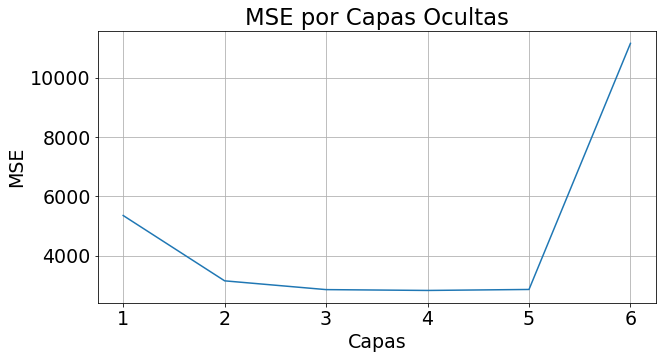

In [64]:

plt.figure(figsize=(10,5))
plt.xlabel('Capas')
plt.title("MSE por Capas Ocultas")
plt.plot(results_capa_oculta['capas_ocultas'], results_capa_oculta['MSE'])
plt.ylabel('MSE')
plt.grid()

Por tanto se escoge el modelo con 3 capas ocultas y 4 neuronas en la capa oculta.

### ELECCION DEL MODELO


* Variables a tener en cuenta.

- [sex, bmi, bp, s1, s3 , s5, s6]

* Capas: 3

* Neuronas en la capa oculta: 4

In [66]:
tf.reset_default_graph()

columnas_modelo = [sex, bmi, bp, s1, s3, s5, s6]

model = tf.estimator.DNNRegressor(hidden_units=[4,4,4],feature_columns=columnas_modelo)

model.train(input_fn=funcion_entrada,steps=5000)

predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

pred_gen = model.predict(predict_input_func)

predictions = list(pred_gen)

predicciones_finales = []

for pred in predictions:
    predicciones_finales.append(pred['predictions'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1xajp1gi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa3de281b00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

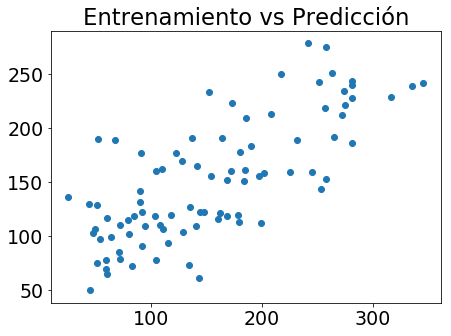

In [70]:
plt.figure(figsize=(7,5))
plt.title("Entrenamiento vs Predicción")
plt.scatter(y_test,predicciones_finales)

In [72]:
metricas = dict()
metricas['MAE'] =  metrics.mean_absolute_error(y_test, predicciones_finales)
metricas['MSE'] =  metrics.mean_squared_error(y_test, predicciones_finales)
metricas['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, predicciones_finales))

metricas

{'MAE': 43.25160894501075,
 'MSE': 2859.7948582558142,
 'RMSE': 53.47704982752708}